In [72]:
import numpy as np

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

In [73]:
Nx = 150
Ny = 150
et = 1E6
N = 1
base_fn = 'output_bal_swe'
pydir = '../%s/' %base_fn

tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
tags = tc.get_tag_dict()

{0: 'before_flux', 1: 'before_advect', 2: 'after_advect', 3: 'after_ebnaexp', 4: 'after_ebnaimp', 5: 'after_half_step', 6: 'after_efna', 7: 'after_full_advect', 8: 'after_full_ebnaexp', 9: 'after_full_step'}


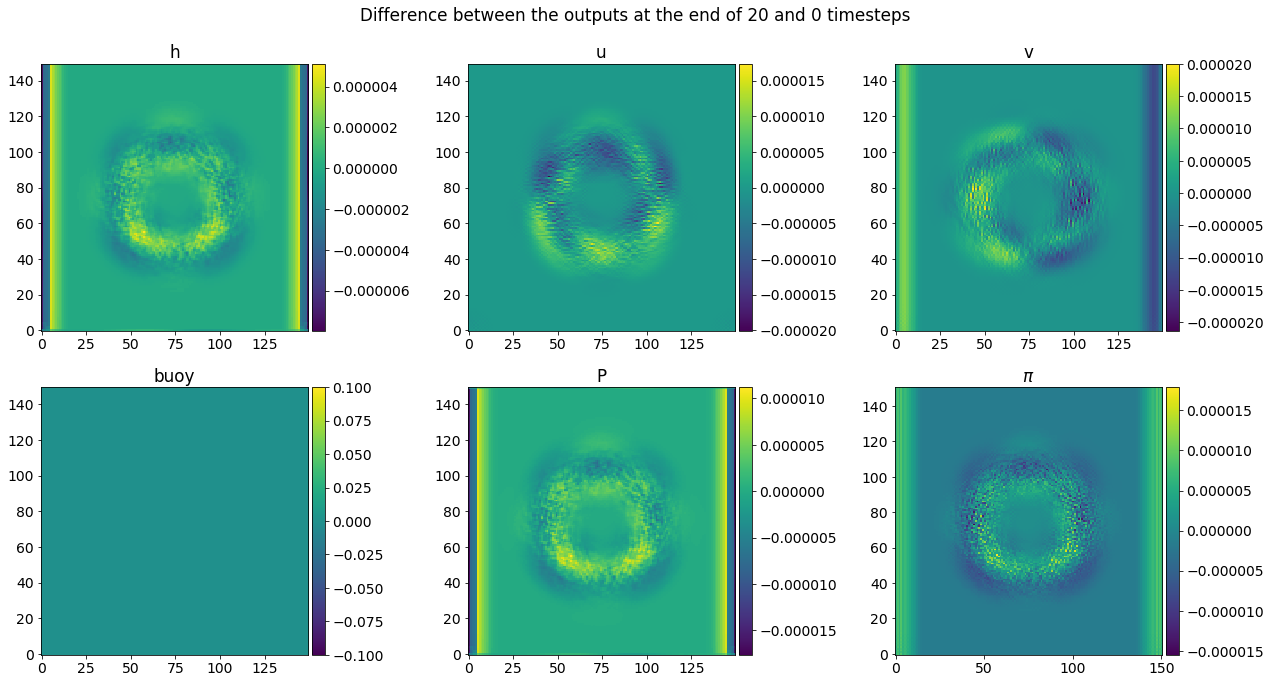

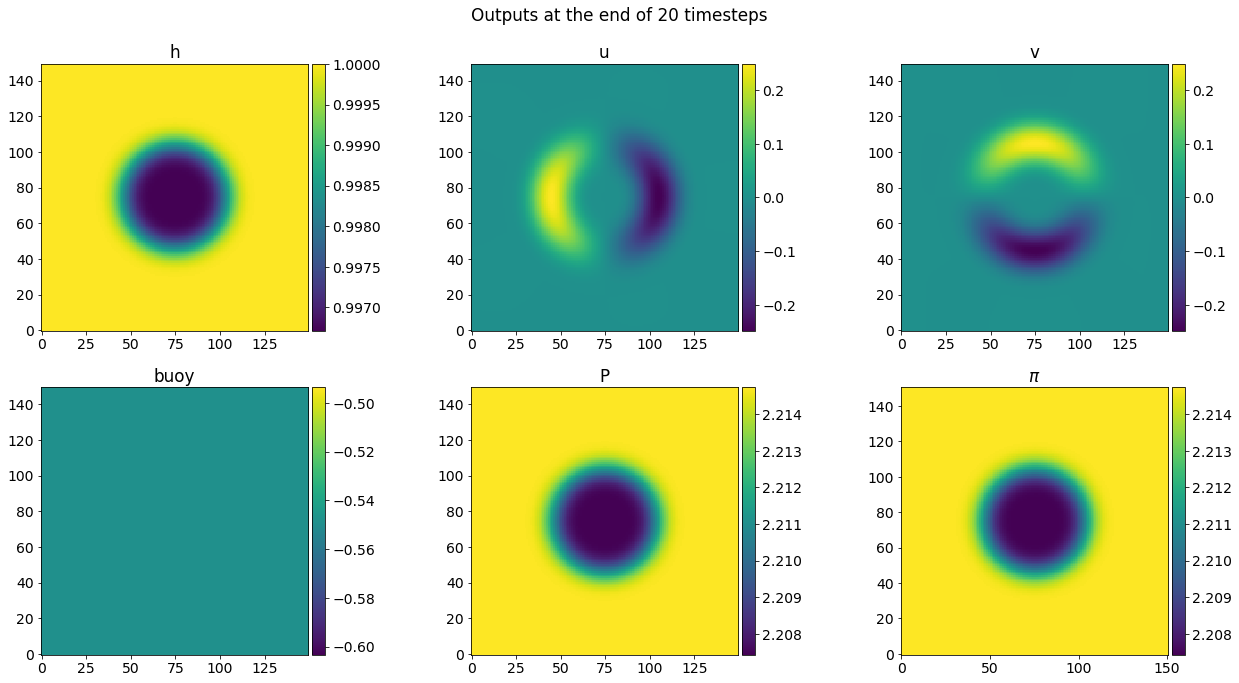

In [139]:
comp_sfx = 'comp_H=1.0_negative_rhs'
comp_sfx = 'comp_1a'
comp_sfx = 'comp'
# comp_sfx = 'comp_last_working_H=0.0_averaging'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)
print(tags)
tag = tags[9]
# tag = 'ic'

idx = [95,95]
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
alabels = ['h', 'u', 'v', 'buoy', 'P', r'$\pi$']
# attributes = ['rho','rhoY','Y']
# attributes = ['rho']
# times = [50, 100, 150, 200, 250, 300]
times = [0,20]
time = 0

lt = 'WINDOW_STEP'
lt = 'STEP'

H = 93.03673529 if H == 'optimal' else H
arr_lst, arr_lst1 = [], []
# for time in times:
for aa, attribute in enumerate(attributes):
    arr1 = tc.get_arr(path, times[1], N, attribute, label_type=lt, tag=tag, inner=True, avg=False)[0]
    arr0 = tc.get_arr(path, times[0], N, attribute, label_type=lt, tag=tag, inner=True, avg=False)[0]

    arr = (arr1-arr0)
#     arr = arr1

#     arr = tc.get_arr(path, time, N, attribute, label_type='STEP', tag=tag, inner=True, avg=False)[0]
    if attribute == 'rho':
#         arr -= H
        rho = np.copy(arr)

    if attribute == 'rhoY':
        rhoY = np.copy(arr)
        Y = rhoY / (rho+1.0)
        
#     if attribute == 'rhov' or attribute == 'rhou':
#         arr /= rho

    arr_lst.append([arr,alabels[aa]])
    arr_lst1.append([arr1,alabels[aa]])
    
#     arr_lst.append([rho - H, 'rho, time-step=%i' %time])
    
pl = pt.plotter(arr_lst,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='equal',suptitle='Difference between the outputs at the end of %i and %i timesteps' %(times[1], times[0]))

pl = pt.plotter(arr_lst1,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='equal',suptitle='Outputs at the end of %i timesteps' %(times[1]))

In [30]:
%%capture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

from IPython.display import HTML

# ref: https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html
N = 150 # Meshsize
# et = 1E6

Lx, Ly = 1E6, 1E6
x = np.linspace(0,Lx,Nx) / 1000
y = np.linspace(0,Ly,Ny) / 1000

H = 100.0
N = 1

X, Y = np.meshgrid(x, y)

frns = np.arange(0,601) # animation frames
time_series = np.zeros((frns.shape[0],Nx,Ny))

comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attribute = 'rho'

for ii,fr in enumerate(frns):
    time_series[ii] = tc.get_arr(path, fr, N, attribute, label_type='STEP', inner=True) - H
    
def update_plot(frame_number, time_series, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, time_series[frame_number,:,:], cmap="magma")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, time_series[0,:,:], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-.5,.5)
ax.set_xlabel(r'$L_x$ [km]')
ax.set_ylabel(r'$L_y$ [km]')
ax.set_zlabel(r'$\delta h$ [m]')
ax.view_init(60, 45)
anim = animation.FuncAnimation(fig, update_plot, frns, fargs=(time_series, plot), interval=100)

In [31]:
HTML(anim.to_html5_video())

0.010000001


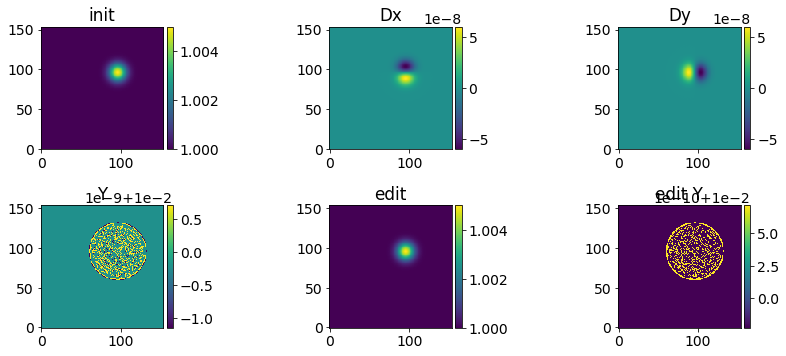

In [80]:
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

init = tc.get_arr(path, 0, N, 'rhoY', label_type='STEP', tag='ic', inner=False, avg=False)[0]
init_rho = tc.get_arr(path, 0, N, 'rho', label_type='STEP', tag='ic', inner=False, avg=False)[0]

dx, dy = np.diff(x)[0], np.diff(y)[0]

Dx = np.gradient(init,dx,axis=0)
Dy = np.gradient(init,dy,axis=1)

# edit = init - (Dx + Dy)

# eDx = np.gradient(edit,dx,axis=0)
# eDy = np.gradient(edit,dy,axis=1)

edit = init_rho / 100.0
# edit -= edit.mean()
# edit += 1.0

arr_lst = [[init, "init"], [Dx,'Dx'], [Dy,'Dy']]
Y = init / init_rho
arr_lst += [[Y, 'Y'], [edit, 'edit'], [edit / init_rho, 'edit Y']]
# arr_lst += [[edit, "edit"], [eDx,'eDx'], [eDy,'eDy']]
pl = pt.plotter(arr_lst,ncols=3)
pl.plot(aspect='equal')


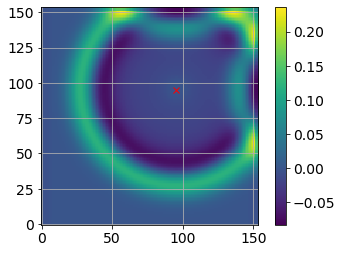

0.0010681152
0.9978649104014039


In [502]:
rhoY = tc.get_arr(path, 100, N, 'rho', label_type='STEP', inner=False, avg=False)[0]

idx = [103,93]
idx = [95,95]

rhoY = rhoY - H

plt.figure()
plt.imshow(rhoY[:,:], origin='lower',aspect='equal')
plt.plot(idx[0],idx[1],'rx')
plt.colorbar()
plt.grid()
plt.show()

print(rhoY[idx[0],idx[1]])
print((1.0 - rhoY[idx[0],idx[1]])**2)

In [229]:
%%capture
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

from IPython.display import HTML

N = 150 # Meshsize


Lx, Ly = 1E6, 1E6
x = np.linspace(0,Lx,Nx) / 1000
y = np.linspace(0,Ly,Ny) / 1000

H = 0.0
N = 1

X, Y = np.meshgrid(x, y)

times = np.arange(0,301) # animation frames

comp_sfx = 'comp_H=1.0_positive_rhs'
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
alabels = ['h', 'u', 'v', 'buoy', 'P', r'$\pi$']
time_series = np.zeros((times.shape[0],len(attributes),2), dtype='object')

for time in times:
    for atr_idx, attribute in enumerate(attributes):
        arr0 = tc.get_arr(path, 0, N, attribute, label_type='STEP', inner=True)
        arr = tc.get_arr(path, time, N, attribute, label_type='STEP', inner=True) - H
        
        if attribute == 'rho': rho = np.copy(arr)
        if attribute == 'rho' and time==0: rho0 = np.copy(arr)
        if attribute == 'rhou' or attribute == 'rhov':
            arr /= rho
            arr0 /= rho0
            attribute = attribute[-1]
#         arr -= arr0
        
        arr = [arr,alabels[atr_idx]]
        time_series[time,atr_idx] = arr


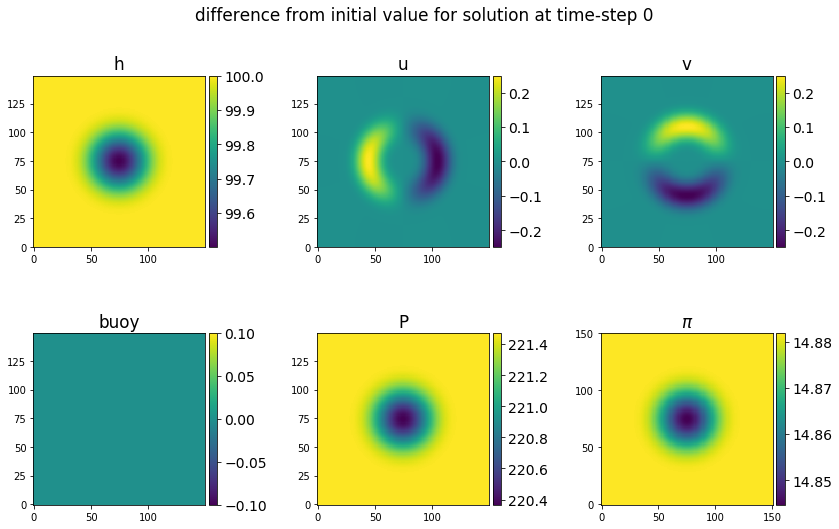

In [230]:
import plotting_tools as pt
pt = reload(pt)

def title_gen(frn):
    return "difference from initial value for solution at time-step %i" %frn

a2d = pt.animator_2D(time_series,ncols=3,figsize=(12,8))
a2d.suptitle = title_gen
anim = a2d.animate(interval=100, aspect='equal')

In [231]:
HTML(anim.to_html5_video())